In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [15]:
df.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [16]:
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)

In [17]:
df_train, df_test = train_test_split(df,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 13)
(1125, 13)


In [19]:
log_model = Logit.from_formula("""BAD~LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                  0.2257
Time:                        11:57:33   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [25]:
y_pred = log_result.predict(df_test)

y_pred_class = (y_pred>0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
       ..
2852    0
895     0
2775    0
2726    0
2624    0
Length: 1125, dtype: int64

In [23]:
print(accuracy_score(df_test["BAD"], y_pred_class))
print(confusion_matrix(df_test["BAD"],y_pred_class))

0.9244444444444444
[[1017    4]
 [  81   23]]


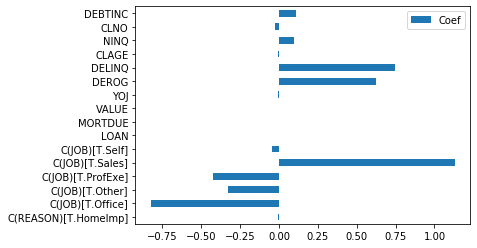

In [27]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]},index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef')

In [31]:
df_char = df.select_dtypes(include = 'object')
df_numeric = df.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled,df_char],axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [32]:
df_scaled["BAD"] = np.where(df_scaled["BAD"]>0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [35]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [45]:
log_model = Logit.from_formula("""BAD~LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_scaled_train)
scaled_log_result = log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                  0.2257
Time:                        13:59:46   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

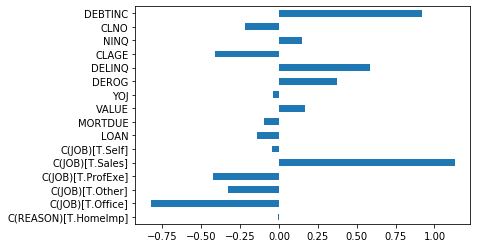

In [47]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]},
                                 index = log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef',legend=False)

In [102]:
df = pd.read_csv(os.getcwd()+"/통신고객이탈.csv",engine='python',encoding='euc-kr')
df

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Churned,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3


In [92]:
tmp=[]
for i in df["CHURN"]:
    if i =="Active":
        tmp.append(1)
    else: tmp.append(0)

df["CHURN"]=tmp
df["CHURN"].value_counts()
# tmp 



1    750
0    180
Name: CHURN, dtype: int64

In [93]:
df=df.drop("CUSTOMER_ID",axis=1)

In [97]:
df_train, df_test = train_test_split(df,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)
df_train["CHURN"].value_counts()

(651, 14)
(279, 14)


1    515
0    136
Name: CHURN, dtype: int64

In [104]:
log_model = Logit.from_formula("""CHURN~C(GENDER)+C(CHARGE_TYPE)+SERVICE_DURATION+DROPPED_CALLS+PEAK_CALLS_NO+PEAK_CALLS_TIME""",df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.484755
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      641
Method:                           MLE   Df Model:                            9
Date:                Mon, 10 Feb 2020   Pseudo R-squ.:                 0.05415
Time:                        14:44:59   Log-Likelihood:                -315.58
converged:                       True   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 3.753e-05
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.1732      0.403      2.909      0.004      

In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [107]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [108]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [109]:
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)

In [110]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [111]:
df_dummy=pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [115]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 19)
(1125, 19)


In [120]:
df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']

tree=DecisionTreeClassifier(random_state=1234)
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))


1.0
0.9315555555555556


In [127]:
train_accuracy =[]; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth.round(3)


,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


No handles with labels found to put in legend.


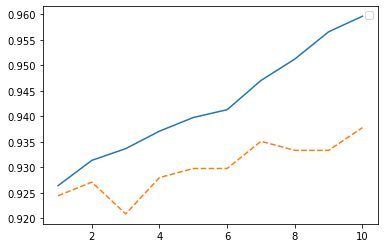

In [128]:
plt.plot(para_depth, train_accuracy, linestyle='-')
plt.plot(para_depth, test_accuracy, linestyle='--')
plt.legend()

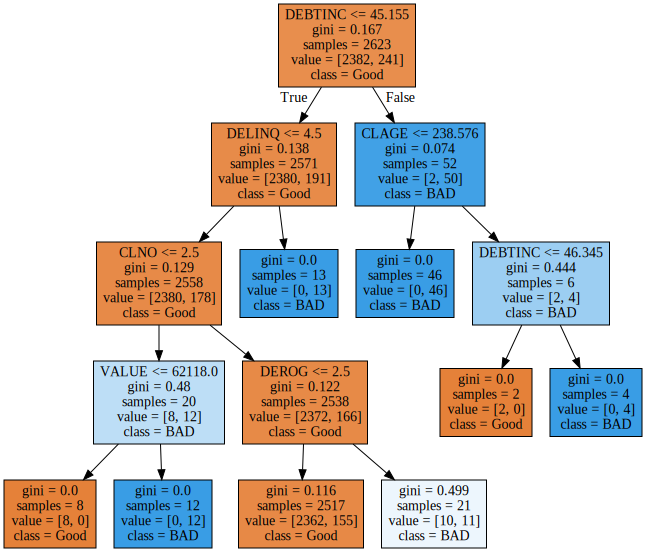

In [131]:
v_feature_name = df_train_x.columns
#깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth = 4 , random_state=1234)
tree_low.fit(df_train_x,df_train_y)
export_graphviz(tree_low,out_file= 'tree_low.dot',class_names=['Good','BAD'],
                feature_names = v_feature_name , impurity= True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

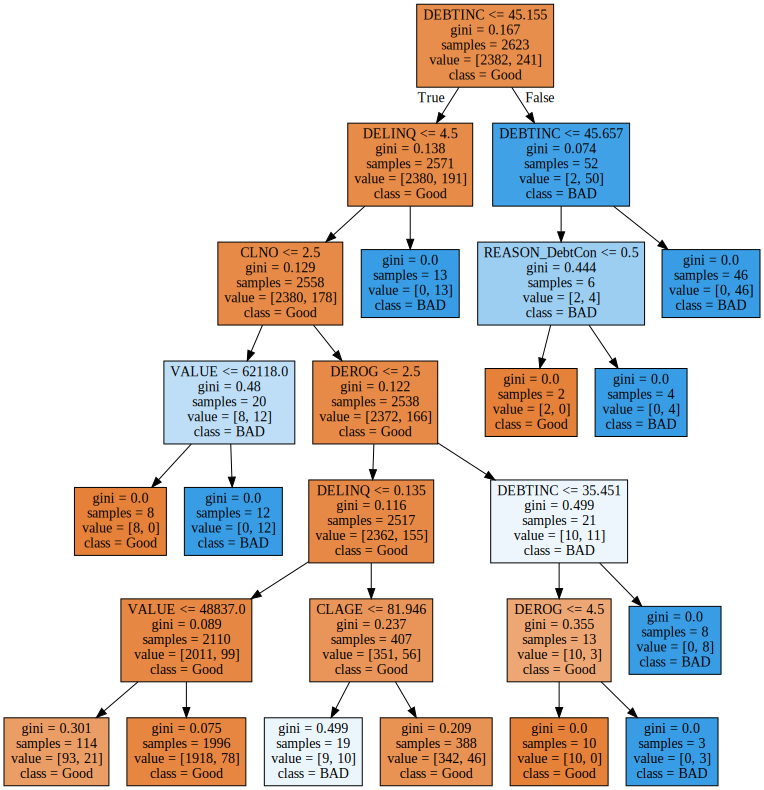

In [132]:
tree_low = DecisionTreeClassifier(max_depth = 6 , random_state=1234)
tree_low.fit(df_train_x,df_train_y)
export_graphviz(tree_low,out_file= 'tree_low.dot',class_names=['Good','BAD'],
                feature_names = v_feature_name , impurity= True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [133]:
train_accuracy =[]; test_accuracy = []
para_split = [i*10 for i in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=4,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['split'] = para_split
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth.round(3)


,split,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


No handles with labels found to put in legend.


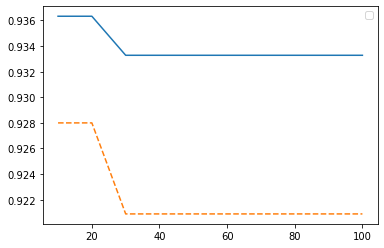

In [135]:
plt.plot(para_split, train_accuracy, linestyle='-')
plt.plot(para_split, test_accuracy, linestyle='--')
plt.legend()

In [136]:
train_accuracy =[]; test_accuracy = []
para_leaf = [i*2 for i in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=20, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['leaf'] = para_leaf
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth.round(3)


,leaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


In [137]:
tree_final = DecisionTreeClassifier(max_depth=4,min_samples_leaf=8,min_samples_split=20,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

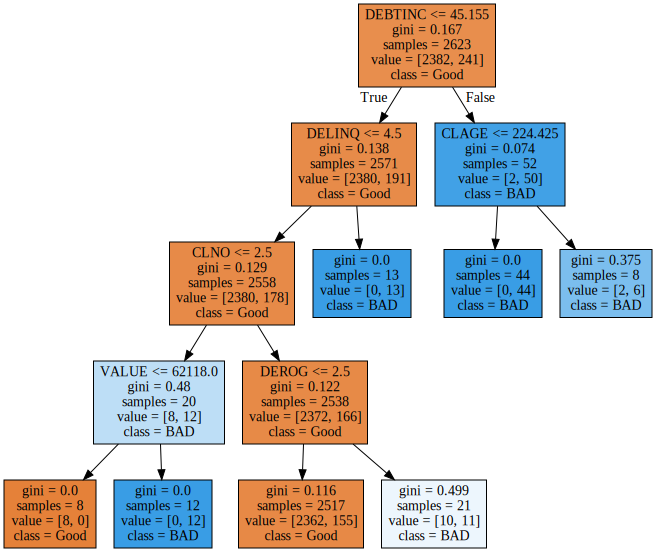

In [138]:
export_graphviz(tree_final,out_file= 'tree_final.dot',class_names=['Good','BAD'],
                feature_names = v_feature_name , impurity= True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [139]:
y_pred = tree_final.predict(df_test_x)
print(tree_final.score(df_test_x, df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.928
[[1015    6]
 [  75   29]]


In [143]:
df_impor = pd.DataFrame()
df_impor['Feature'] = v_feature_name
df_impor['importance'] = tree_final.feature_importances_

df_impor.sort_values("importance", ascending = False, inplace=True)
df_impor.round(3)


df_impor.sort_values("importance", ascending = True, inplace=True)
coordinates = range(len(df_impor))
plt.barh(y=coordinates, width = df_impor['importance'])
plt.yticks(coordinates, df_impor['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

,Feature,importance
9,DEBTINC,0.602
5,DELINQ,0.168
8,CLNO,0.085
2,VALUE,0.072
4,DEROG,0.067
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '설명변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

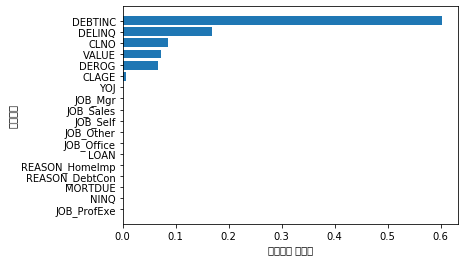

In [144]:

df_impor.sort_values("importance", ascending = True, inplace=True)
coordinates = range(len(df_impor))
plt.barh(y=coordinates, width = df_impor['importance'])
plt.yticks(coordinates, df_impor['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [145]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.936


In [171]:
df = pd.read_csv(os.getcwd()+"/통신고객이탈.csv",engine='python',encoding='euc-kr')
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [172]:
tmp=[]
for i in df["CHURN"]:
    if i =="Active":
        tmp.append(1)
    else: tmp.append(0)
df["CHURN"]=tmp

# np.where(df['CHURN']=='Active',0,1)
df["CHURN"].value_counts()





1    750
0    180
Name: CHURN, dtype: int64

In [173]:
df= df.drop("CUSTOMER_ID",axis=1)

df_dummy=pd.get_dummies(df)
df_dummy

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,1,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,1,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,1,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,1,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0,19,17.40,12,60,100.8,27,59.4,127,628.2,...,0,1,0,0,0,0,1,0,0,0
926,0,59,17.37,15,82,130.2,12,25.8,357,650.7,...,0,0,1,0,0,0,1,0,0,0
927,0,33,44.93,12,174,286.2,25,67.0,596,1039.0,...,0,0,0,0,0,0,1,0,0,0
928,0,25,40.43,14,315,552.0,0,0.0,609,1188.3,...,0,0,0,0,0,0,1,0,0,0


In [174]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

df_train_x = df_train.drop('CHURN',axis=1)
df_train_y = df_train['CHURN']

df_test_x = df_test.drop('CHURN',axis=1)
df_test_y = df_test['CHURN']

tree=DecisionTreeClassifier(random_state=1234)
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))


(651, 34)
(279, 34)
1.0
0.8530465949820788


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [177]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [178]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [179]:
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)

In [180]:

df_dummy=pd.get_dummies(df)
df_dummy.head()



,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [181]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)



(2623, 19)
(1125, 19)


In [183]:

df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']

tree=RandomForestClassifier(random_state=1234)
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))



0.9919939001143728
0.944


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [185]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


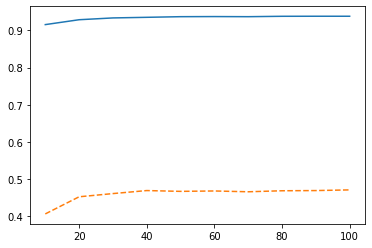

In [188]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, test_score, linestyle = '--', label = "test_score")

In [203]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator,oob_score=True,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1-rf.oob_score_)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not hav

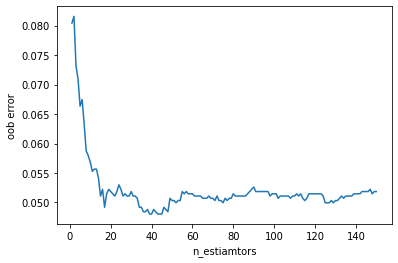

In [204]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estiamtors')
n_estimators=100

In [191]:
train_score=[]; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=60,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,leaf,TrainScore,TestScore
0,1,1.000,0.948
1,2,0.986,0.941
2,3,0.972,0.939
3,4,0.959,0.936
4,5,0.950,0.934
5,6,0.948,0.935
6,7,0.943,0.932
7,8,0.939,0.932
8,9,0.938,0.932
9,10,0.935,0.931


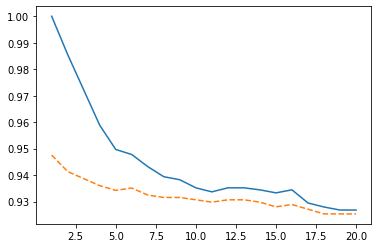

In [192]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '--', label = "test_score")

In [193]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(n_estimators=60,min_samples_leaf=1,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.998,0.944
1,6,0.992,0.944
2,8,0.982,0.941
3,10,0.978,0.939
4,12,0.973,0.940
5,14,0.968,0.939
6,16,0.965,0.940
7,18,0.960,0.939
8,20,0.958,0.938
9,22,0.955,0.936


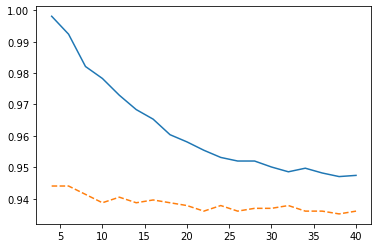

In [194]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, test_score, linestyle = '--', label = "test_score")

In [197]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,20)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(n_estimators=60,min_samples_leaf=1,min_samples_split=2, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.908,0.908
1,2,0.911,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.939,0.930
5,6,0.941,0.931
6,7,0.944,0.936
7,8,0.947,0.936
8,9,0.951,0.935
9,10,0.955,0.937


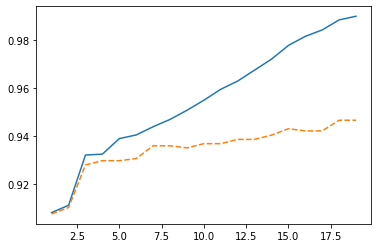

In [198]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, test_score, linestyle = '--', label = "test_score")

In [200]:
rf_final = RandomForestClassifier(n_estimators=60,min_samples_leaf=1,min_samples_split=2, max_depth=18, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

print(rf_final.score(df_train_x, df_train_y))
print(rf_final.score(df_test_x, df_test_y))

0.988562714449104
0.9466666666666667


In [201]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
9,DEBTINC,0.274
8,CLNO,0.108
5,DELINQ,0.093
6,CLAGE,0.093
2,VALUE,0.088
0,LOAN,0.074
1,MORTDUE,0.074
3,YOJ,0.047
7,NINQ,0.046
4,DEROG,0.037


In [202]:
estimator = RandomForestClassifier(random_state=1234, n_estimators=60)
param_grid = {
             "max_depth":para_depth, "min_samples_split":para_split,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=19, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)
{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.941
